In [1]:
import numpy as np 
import scipy.special as sp
import matplotlib.pyplot as plt 

plt.rcParams['text.usetex'] = True

In [2]:
z_ref = 2193 
T_ma  = -9.02 
alpha = 10.8
T_p   = 196
dTdz  = 6.5e-3

std_coefs = np.array([8.29376332e-05, -3.45256005e-02, 6.31076200e+00])

In [3]:
def func_of_year(t, z=z_ref): 
    return T_ma + alpha*np.cos(2.0*np.pi*(t-T_p/365)) + dTdz*(z_ref-z) 

def func_of_doy(t, z=z_ref): 
    return T_ma + alpha*np.cos(2.0*np.pi*(t-T_p)/365) + dTdz*(z_ref-z) 

def PDD_Calov_and_Greve(temp, stdv):
    
    # compute Calov and Greve (2005) integrand, ignoring division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        normtemp = temp / (np.sqrt(2)*stdv)
        
    CalovGreve = (stdv/np.sqrt(2*np.pi)*np.exp(-normtemp**2) + temp/2*sp.erfc(-normtemp))
    
    return CalovGreve

In [4]:
t_year = np.linspace(0,2,1001)
t_doy  = np.linspace(0,2*365, 2*365 +1)

std_doy  = np.polyval(std_coefs, t_doy - np.floor_divide(t_doy, 365) * 365)
std_year = np.polyval(std_coefs, (t_year-np.floor(t_year))*365)

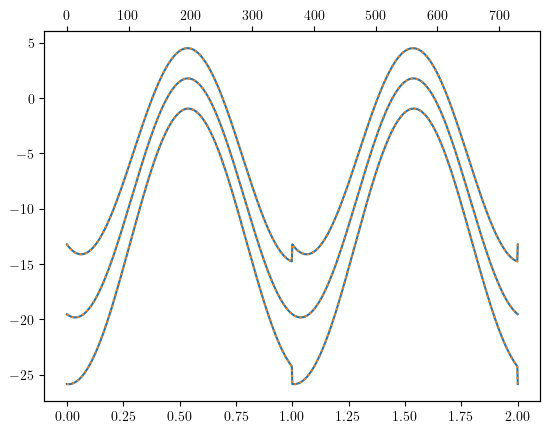

In [5]:
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()
# # ax3 = ax1.twinx()
# ax4 = ax2.twinx()

ax1.plot(t_year, func_of_year(t_year), c='tab:blue')
ax1.plot(t_year, func_of_year(t_year)+std_year, c='tab:blue')
ax1.plot(t_year, func_of_year(t_year)-std_year, c='tab:blue')

ax2.plot(t_doy,  func_of_doy(t_doy), ls=':', c='tab:orange')
ax2.plot(t_doy,  func_of_doy(t_doy)+std_doy, ls=':', c='tab:orange')
ax2.plot(t_doy,  func_of_doy(t_doy)-std_doy, ls=':', c='tab:orange')

# t_i = 0.00
# dt  = 0.5
# timesteps = np.concatenate((np.ones(int(1/dt))     * dt, 
#                             np.ones(int(1/(dt/2))) * (dt/2)))

# for dt in timesteps:
    
    
#     t_ip1 = t_i + dt
        
#     n = 101
#     t_small = np.linspace(t_i, t_ip1, n)
    
#     ax1.plot(t_small, func_of_year(t_small), marker='x')
    
#     std_year = np.polyval(std_coefs, (t_small-np.floor(t_small))*365)
    
#     # ax1.plot(t_small, func_of_year(t_small)-std_year)
#     # ax1.plot(t_small, func_of_year(t_small)+std_year)

#     t_i = t_ip1
# # ax1.plot(t_year, func_of_year(t_year)+std_year)
# # ax1.plot(t_year, func_of_year(t_year)-std_year)


# ax1.axhline(0.0, c='k', ls=":")


# ax1.plot(t_doy, PDD_Calov_and_Greve(func_of_doy(t_doy), std_doy))
# ax1.plot(t_doy, PDD_Calov_and_Greve(func_of_doy(t_doy), std_doy))


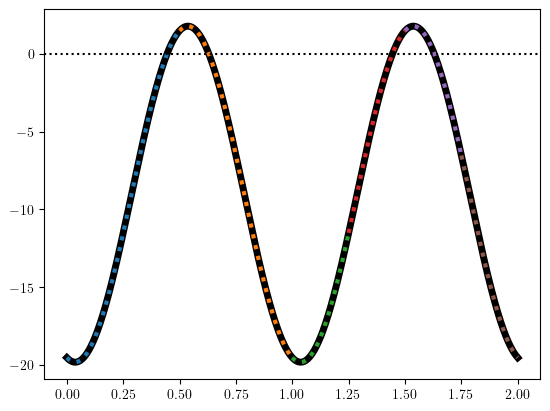

In [6]:
fig, ax1 = plt.subplots()

t_i = 0.00
dt  = 0.5
timesteps = np.concatenate((np.ones(int(1/dt))     * dt, 
                            np.ones(int(1/(dt/2))) * (dt/2)))

ax1.plot(t_year, func_of_year(t_year), c='k', lw=5.0)


for dt in timesteps:
    
    
    t_ip1 = t_i + dt
        
    n = 51
    t_small = np.linspace(t_i, t_ip1, n)
    
    ax1.plot(t_small, func_of_year(t_small), ls=":", lw=3.0)
    
#     std_year = np.polyval(std_coefs, (t_small-np.floor(t_small))*365)
    
#     ax1.plot(t_small, func_of_year(t_small)-std_year)
#     ax1.plot(t_small, func_of_year(t_small)+std_year)

    t_i = t_ip1
# ax1.plot(t_year, func_of_year(t_year)+std_year)
# ax1.plot(t_year, func_of_year(t_year)-std_year)


ax1.axhline(0.0, c='k', ls=":")


# ax1.plot(t_doy, PDD_Calov_and_Greve(func_of_doy(t_doy), std_doy))
# ax1.plot(t_doy, PDD_Calov_and_Greve(func_of_doy(t_doy), std_doy))

In [7]:
n_year = 401
t_year = np.linspace(0,1,n_year)
t_doy  = np.linspace(0,365, 365+1)

std_doy  = np.polyval(std_coefs, t_doy - np.floor_divide(t_doy, 365) * 365)
std_year = np.polyval(std_coefs, (t_year-np.floor(t_year))*365)

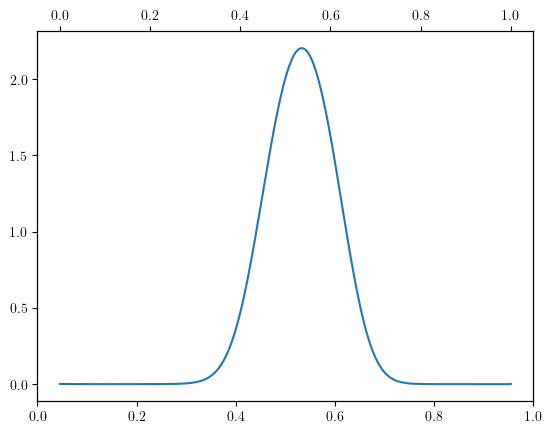

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

# ax1.plot(t_doy, PDD_Calov_and_Greve(func_of_doy(t_doy), std_doy))

ax2.plot(t_year, PDD_Calov_and_Greve(func_of_year(t_year), std_year))

In [9]:
PDD_doy  = PDD_Calov_and_Greve(func_of_doy(t_doy), std_doy)
PDD_year = PDD_Calov_and_Greve(func_of_year(t_year), std_year)

In [10]:
PDD_doy.sum()

156.60495254385552

In [11]:
PDD_year.sum() * 365*(1-0)/(n_year-1)

156.60472559374512

In [12]:
timesteps = np.loadtxt('../timesteps.dat')

_, idx = np.unique(timesteps[:,0], return_index=True)

(0.0, 1.0)

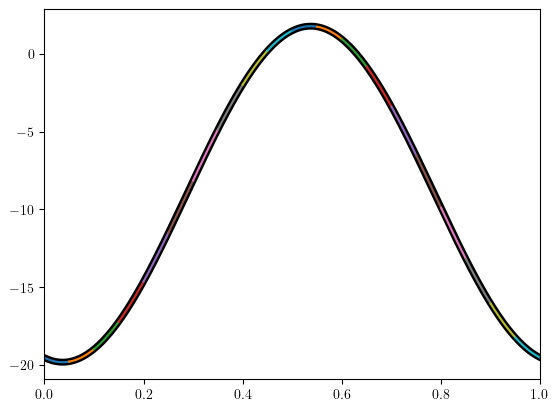

In [13]:
fig, ax = plt.subplots()

ax.plot(t_year, func_of_year(t_year), c='k', lw=5.0)


for i in idx: 
    t_i, t_ip1 = timesteps[i]
        
    n = 100
    t_small = np.linspace(t_i, t_ip1, n)

    ax.plot(t_small, func_of_year(t_small))

    
ax.set_xlim(0,1)

In [14]:
165 % 15

0

In [15]:

time_ip1 = np.concatenate((np.linspace(0,5,6),
                           np.linspace(5.1, 6.9, 19),
                           np.linspace(7,12,6)))

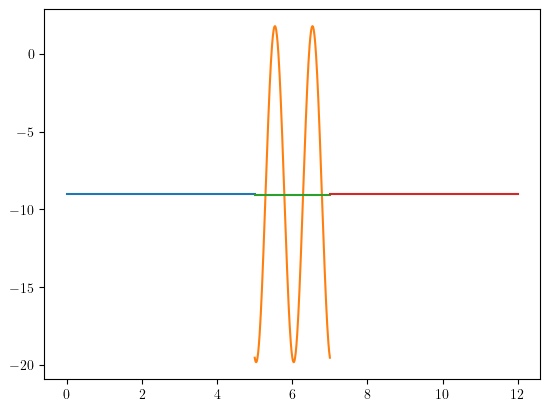

In [16]:


plt.plot(np.linspace(0,5,10), np.ones(10)*T_ma)
plt.plot(np.linspace(5, 7, 201), func_of_year(np.linspace(5, 7, 201)))


plt.plot(np.linspace(5, 7, 10),  np.ones(10)*func_of_year(np.linspace(5, 7, 201)).mean())

plt.plot(np.linspace(7,12,10), np.ones(10)*T_ma)


In [17]:
# time at the end of the current timestep
timesteps = np.concatenate((np.arange(0.1,1.1,0.1),
                            np.arange(1.05,2.05,0.05), 
                            np.arange(2.1,3.1,0.1)))

# timestep size of the current timestep
timestep_sizes = np.concatenate((np.ones(10) * 0.1, 
                                 np.ones(20) * 0.05, 
                                 np.ones(10) * 0.1))

temperature = np.zeros_like(timesteps)

# densely sampled time array for comparison 
time_dense = np.linspace(0.0,3,3000)

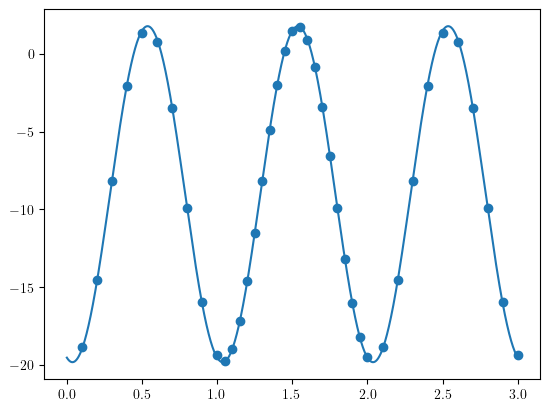

In [18]:
fig, ax = plt.subplots()

# reference to compare too
ax.plot(time_dense, func_of_year(time_dense))

for i in range(len(timesteps)): 
    
    # # time at the end of the current timestep
    # time_ip1 = timesteps[i]
    # current timestep size
    dt = timestep_sizes[i]
    # time at the start of the current timestep 
    time_i   = timesteps[i] - dt/2
    time_ip1 = timesteps[i] + dt/2

    # interpolated time array 
    time_interp = np.linspace(time_i, time_ip1, 100)
    
    # ax.plot(time_interp, func_of_year(time_interp))
    
    temperature[i] = func_of_year(time_interp).mean()

    
ax.scatter(timesteps, temperature)
    



In [19]:
print(temperature[0:10].mean())
print(temperature[10:30].mean())
print(temperature[30:40].mean())

-9.02
-9.020000000000008
-9.020000000000007


In [20]:
import xarray as xr
from thermal.derived_fields import calc_percent_temperate

In [21]:
src_fps = ['/Volumes/thermal_ssd/crmpt12/thinned/crmpt12_dx_50_NT_30000_dt_0.1_MB_-0.37_OFF_Tma_-8.5_prog.zarr/',
           '/Volumes/thermal_ssd/crmpt12_dx_50_NT_30000_dt_0.1_MB_-0.37_OFF_Tma_-8.5_prog.zarr/']


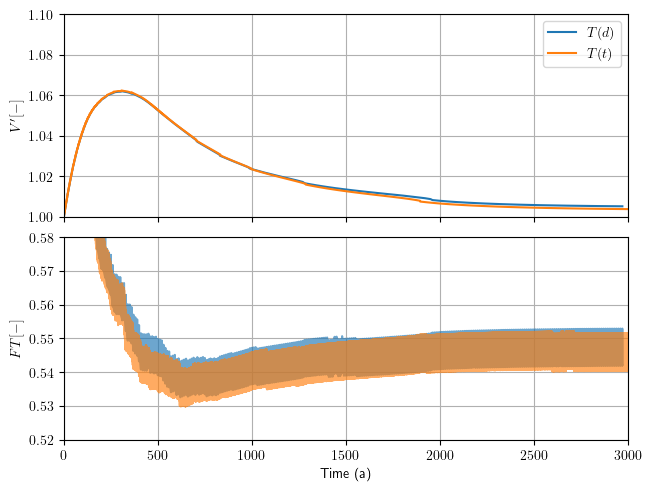

In [22]:
fig, ax = plt.subplots(2,1, sharex=True, 
                      constrained_layout=True)

labels = ['$T(d)$', '$T(t)$']

for i, src_fp in enumerate(src_fps): 
    src = xr.open_zarr(src_fp).squeeze()
    src['relative_volume'] = src.relative_volume / src.relative_volume.isel(t=0)
    src['percent_temperate'] = calc_percent_temperate(src)
    
    ax[0].plot(src.t, src.relative_volume, label=labels[i])
    ax[1].plot(src.t, src.percent_temperate/100, alpha=0.65)

ax[0].set_ylim(1.0, 1.1)
ax[1].set_ylim(0.52, 0.58)

ax[1].set_xlim(0, 3000)

[ax[i].grid() for i in range(2)]

ax[0].legend()

ax[0].set_ylabel("$V' [-]$")
ax[1].set_ylabel("$FT [-]$")
ax[1].set_xlabel("Time (a)")

fig.savefig('reparam_initialization_test.png', dpi=300)

In [1]:
import xarray as xr 
import matplotlib.pyplot as plt 
from thermal.plotting import enthalpy_pcolormesh

In [2]:
src = xr.open_zarr('../result/crmpt12/gridded/crmpt12_dx_50_TT_45.0_MB_-0.37_OFF_Tma_-8.5_B_1.000e-03_SP_2_QP_13.zarr')

(<Figure size 600x300 with 2 Axes>,
 <AxesSubplot: >,
 <matplotlib.colorbar.Colorbar at 0x144a9a280>)

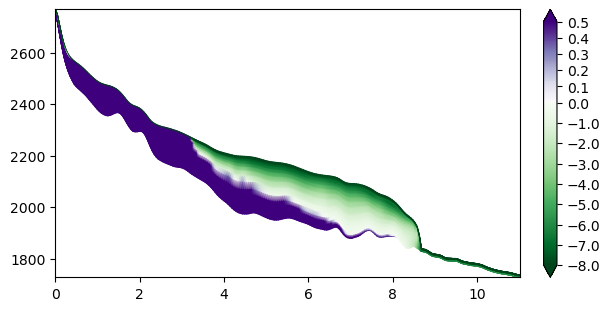

In [4]:
enthalpy_pcolormesh(src, -1)